## RDKit MCS demo - maximum common substructure variations

Jeremy Yang

 * http://rdkit.org/docs/source/rdkit.Chem.fmcs.fmcs.html
 * https://www.rdkit.org/docs/source/rdkit.Chem.rdFMCS.html

In [1]:
import sys,os,tempfile
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS

### Input example molecules

In [2]:
smitxt = """\
Cc1nc(CN(C(C)c2ncccc2)CCCCN)ccc1	CHEMBL1682991
Cc1ccc(CN(C(C)c2ccccn2)CCCCN)nc1	CHEMBL1682990
Cc1cccnc1CN(C(C)c1ccccn1)CCCCN	CHEMBL1682998
CC(N(CCCCN)Cc1c(N)cccn1)c1ccccn1	CHEMBL1682987
Cc1cc(C)c(CN(C(C)c2ccccn2)CCCCN)nc1	CHEMBL1682992
Cc1cc(C(C)N(CCCCN)Cc2c(C)cccn2)ncc1	CHEMBL1682993
Cc1nc(C(C)N(CCCCN)Cc2nc3c([nH]2)cccc3)ccc1	CHEMBL1682878
CC(c1ncccc1)N(CCCCN)Cc1nc2c([nH]1)cccc2	CHEMBL1682867
CC(N(CCCCN)Cc1c(C(C)(C)C)cccn1)c1ccccn1	CHEMBL1682989
CC(N(CCCCN)Cc1c(C(F)(F)F)cccn1)c1ccccn1	CHEMBL1682988"""
with tempfile.NamedTemporaryFile("w", suffix=".smiles", delete=False) as f:
  f.write(smitxt+"\n")
molReader = Chem.SmilesMolSupplier(f.name, delimiter="\t", smilesColumn=0, nameColumn=1, titleLine=False, sanitize=True)
mols=[];
for mol in molReader:
  if mol is not None: mols.append(mol)
print(f'{len(mols)} mols read from {molReader}')

10 mols read from <rdkit.Chem.rdmolfiles.SmilesMolSupplier object at 0x7f63aa0d2430>


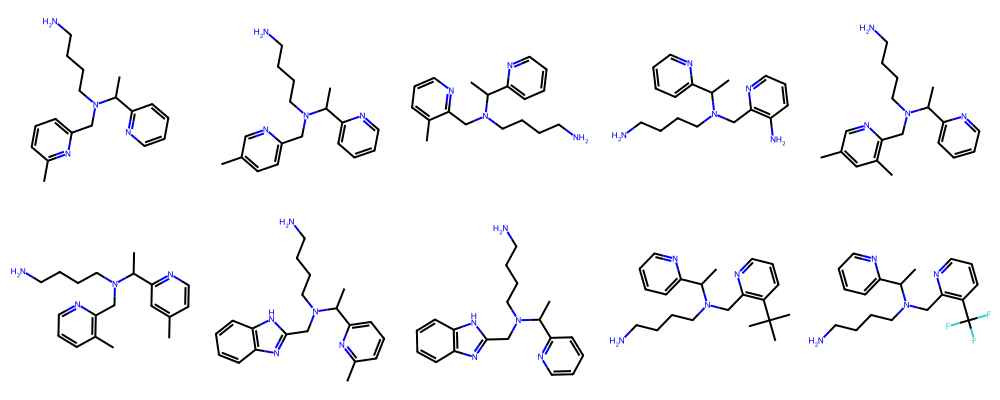

In [3]:
Draw.MolsToGridImage(mols, molsPerRow=5)

### FMCS

 * MCS parameters

In [4]:
params = rdFMCS.MCSParameters()
params.MaximizeBonds = False #MCES

 * Atom parameters

In [5]:
setattr(params, "AtomTyper", rdFMCS.AtomCompare.names["CompareElements"])
params.AtomCompareParameters.MatchFormalCharge = False
params.AtomCompareParameters.RingMatchesRingOnly = False

 * Bond parameters

In [6]:
setattr(params, "BondTyper", rdFMCS.BondCompare.names["CompareOrder"])
params.BondCompareParameters.RingMatchesRingOnly = False
params.BondCompareParameters.CompleteRingsOnly = False
params.BondCompareParameters.MatchStereo = False

 * Run MCS

In [7]:
mcs = rdFMCS.FindMCS(mols, params)
print(f"MCS atoms: {mcs.numAtoms}; bonds: {mcs.numBonds}")
print(f"MCS SMARTS: {mcs.smartsString}")

MCS atoms: 21; bonds: 21
MCS SMARTS: [#6](:[#7]:[#6]-[#6]-[#7](-[#6](-[#6])-[#6]1:[#7]:[#6]:[#6]:[#6]:[#6]:1)-[#6]-[#6]-[#6]-[#6]-[#7]):[#6]:[#6]:[#6]


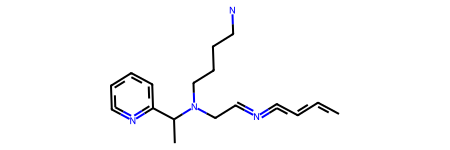

In [8]:
qmol = Chem.MolFromSmarts(mcs.smartsString)
qmol

 * View molecules with MCS highlighted

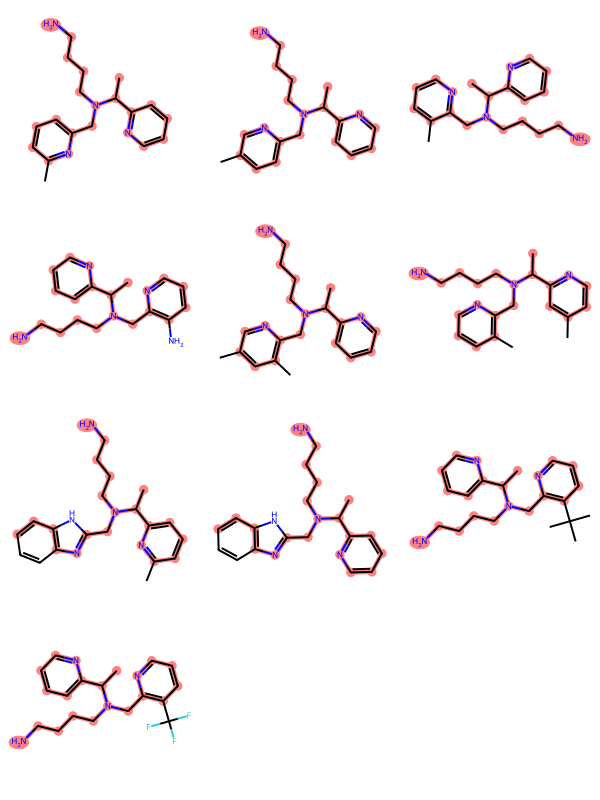

In [9]:
Draw.MolsToGridImage(mols, highlightAtomLists = [mol.GetSubstructMatch(qmol) for mol in mols], useSVG=False)

 * Vary parameters

MCS atoms: 16; bonds: 16
MCS SMARTS: [#6&R]-&!@[#6&!R]-&!@[#7&!R](-&!@[#6&!R](-&!@[#6&!R])-&!@[#6&R]1:&@[#7&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@1)-&!@[#6&!R]-&!@[#6&!R]-&!@[#6&!R]-&!@[#6&!R]-&!@[#7&!R]


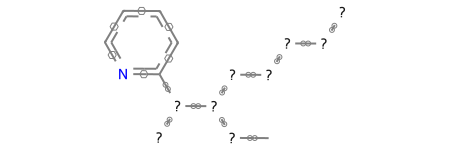

In [10]:
params.MaximizeBonds = True #MCES
params.AtomCompareParameters.RingMatchesRingOnly = True
params.BondCompareParameters.RingMatchesRingOnly = True
params.BondCompareParameters.CompleteRingsOnly = True
mcs = rdFMCS.FindMCS(mols, params)
print(f"MCS atoms: {mcs.numAtoms}; bonds: {mcs.numBonds}")
print(f"MCS SMARTS: {mcs.smartsString}")
qmol = Chem.MolFromSmarts(mcs.smartsString)
qmol

 * View molecules with MCS highlighted

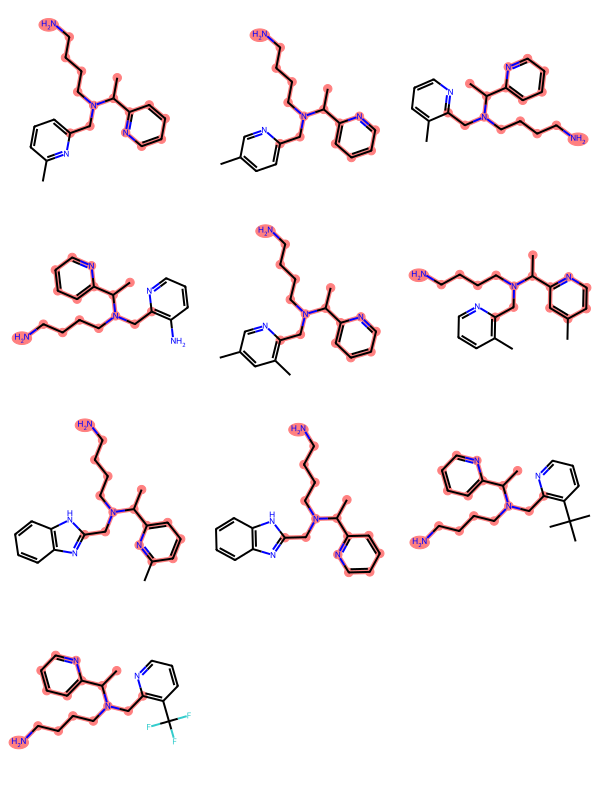

In [11]:
Draw.MolsToGridImage(mols, highlightAtomLists = [mol.GetSubstructMatch(qmol) for mol in mols], useSVG=False)